In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
from scipy import stats

import seaborn as sns


In [11]:
Data_Directory = './Arduino_Adafruit/Data'
file = Data_Directory + '/rssi_data_20240930_141953_2m.csv'



In [12]:
df = pd.read_csv(file)
df = df.drop(df[df['RSSI'] == 0].index)

# Normalize the Timestamp by subtracting the first value
df['Timestamp'] = df['Timestamp'] - df['Timestamp'].iloc[0]

# Display the resulting DataFrame
df

,Timestamp,RSSI
0,0,-85
1,8,-86
2,17,-88
3,30,-86
4,36,-86
...,...,...
2069,18105,-82
2071,18121,-84
2074,18154,-84
2075,18167,-87


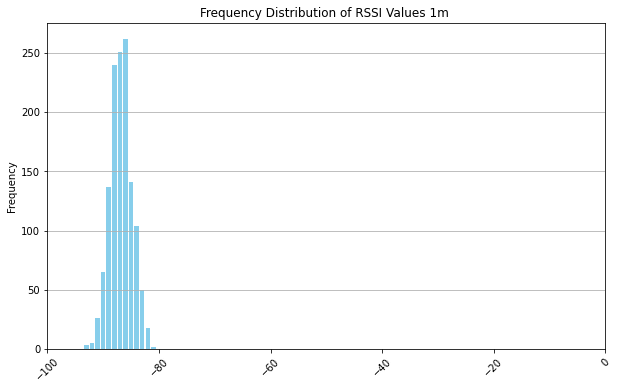

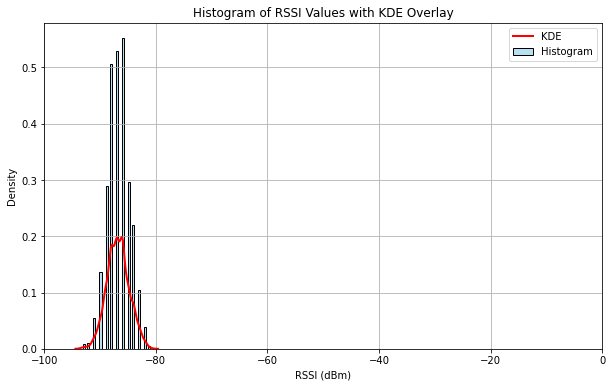

In [13]:
rssi_counts = df['RSSI'].value_counts().sort_index()

# Plot the frequency distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rssi_counts.index, rssi_counts.values, color='skyblue')
plt.xlim(-100, -0)  
plt.ylabel('Frequency')
plt.title('Frequency Distribution of RSSI Values 1m ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
# Show the plot
plt.show()

rssi_values = df['RSSI'] 

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(rssi_values, kde=False, color='skyblue', stat='density', label='Histogram', alpha=0.6)
# Overlay the KDE
sns.kdeplot(rssi_values, color='red', label='KDE', linewidth=2)

# Final plot settings
plt.xlabel('RSSI (dBm)')
plt.ylabel('Density')
plt.title('Histogram of RSSI Values with KDE Overlay')
plt.legend()
plt.grid()
plt.xlim(-100, 0)  # Adjust based on your data range
plt.show()